In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Raw data

In [2]:
barra_file = '/g/data/xv83/dbi599/rba/FFDI/BARRA-R2/FFDIgt99p_yr_BARRA-R2_aus-states_1980-2024.csv'
df_barra = pd.read_csv(barra_file)

In [3]:
def plot_location(model, experiment, location, start_year=1950):
    """Scatterplot for a given location"""

    infile = f'/g/data/xv83/dbi599/rba/FFDI/{model}/{experiment}/FFDIgt99p_yr_{model}_{experiment}_ensemble_aus-states_1950-2100.csv'
    df = pd.read_csv(infile)
    fig, ax = plt.subplots(figsize=[15,7])
    sns.scatterplot(
        ax=ax,
        data=df[df['year'] >= start_year],
        x='year',
        y=location,
        hue='run',
    )
    sns.scatterplot(
        ax=ax,
        data=df_barra,
        x='year',
        y=location,
        color='black',
        label='BARRA-R2',
    )
    ax.set_ylabel('FFDIgt99p')
    ax.set_title(f'{model} - {experiment} - {location}')
    ax.grid()
    plt.show()

In [4]:
def plot_dist(model, experiment, location, start_year=1950, end_year=2014):
    """Histogram for a given location"""

    infile = f'/g/data/xv83/dbi599/rba/FFDI/{model}/{experiment}/FFDIgt99p_yr_{model}_{experiment}_ensemble_aus-states_1950-2100.csv'
    df = pd.read_csv(infile)
    df_ref = df[(df['year'] >= start_year) & (df['year'] <= end_year)]
    fig, ax = plt.subplots()
    sns.histplot(
        ax=ax,
        data=df_ref,
        x=location,
    )
    ax.set_ylabel('FFDIgt99p')
    ax.set_title(f'{model} - {experiment} - {location}')
    ax.grid()
    plt.show()

#### ACCESS-CM2

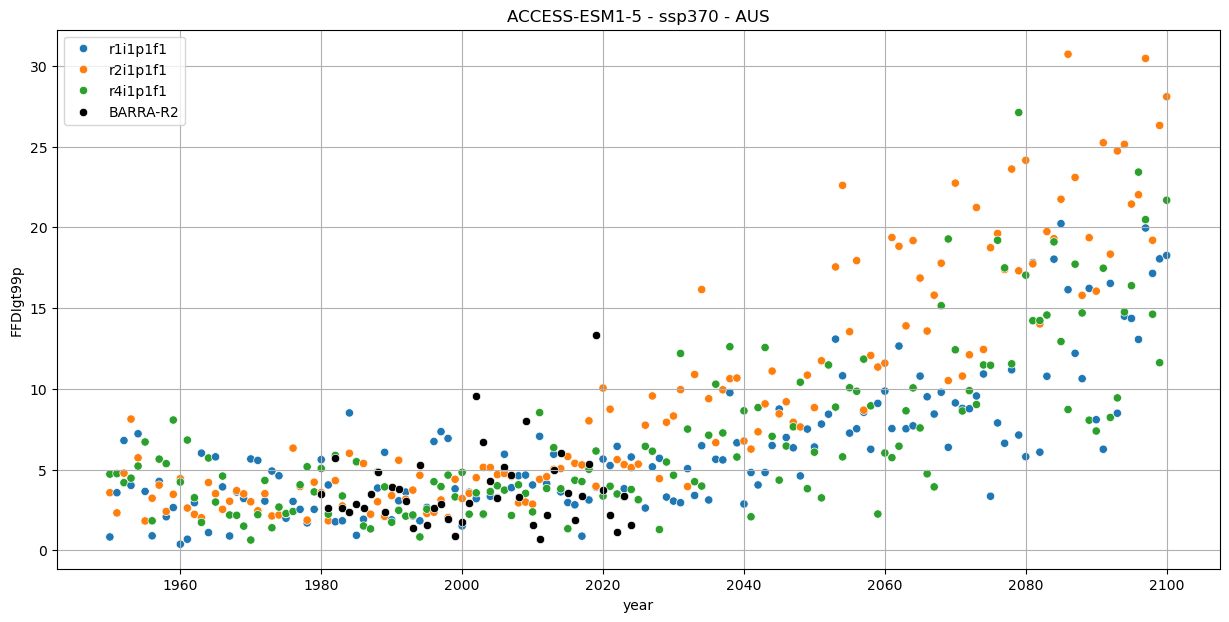

In [5]:
plot_location('ACCESS-ESM1-5', 'ssp370', 'AUS')

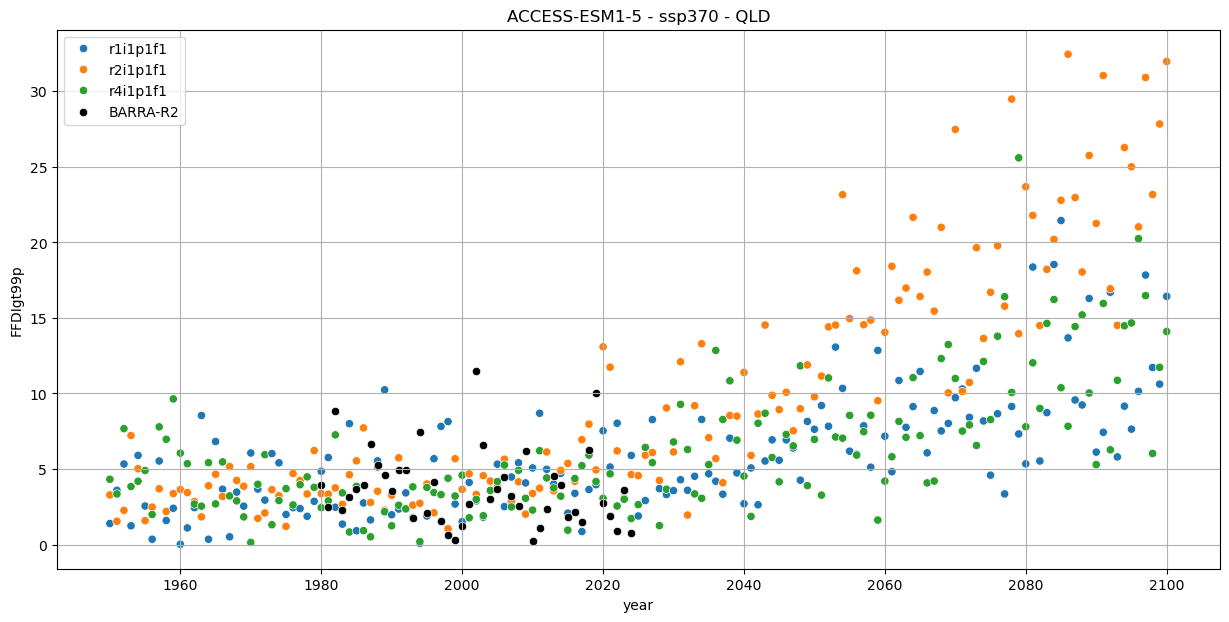

In [6]:
plot_location('ACCESS-ESM1-5', 'ssp370', 'QLD')

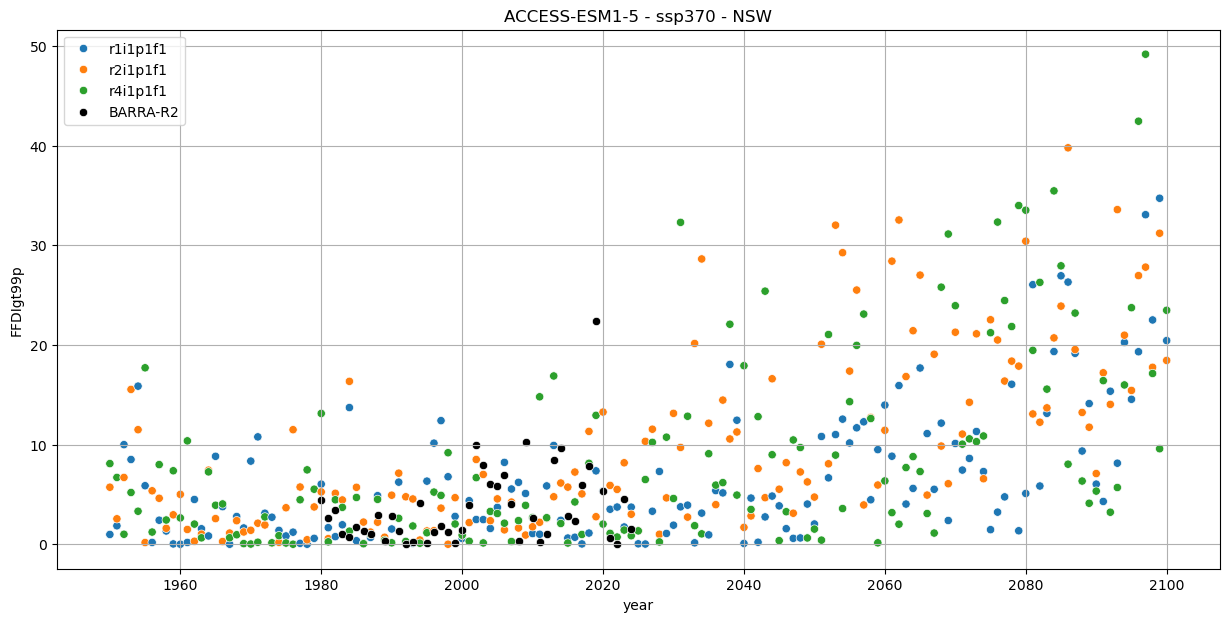

In [7]:
plot_location('ACCESS-ESM1-5', 'ssp370', 'NSW')

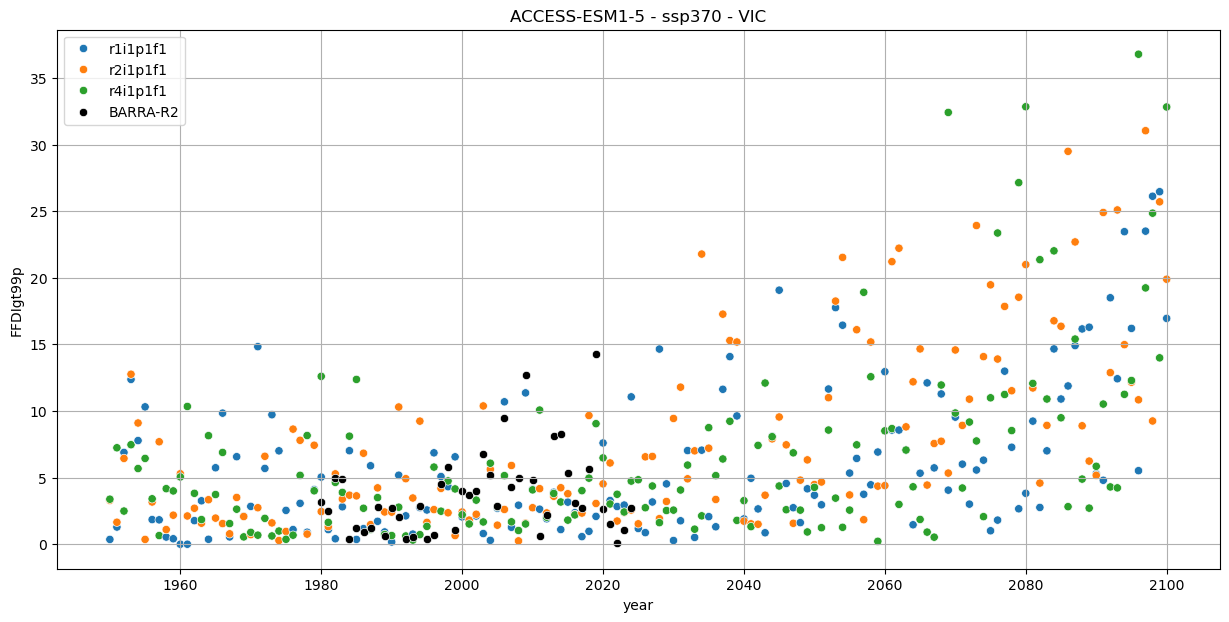

In [8]:
plot_location('ACCESS-ESM1-5', 'ssp370', 'VIC')

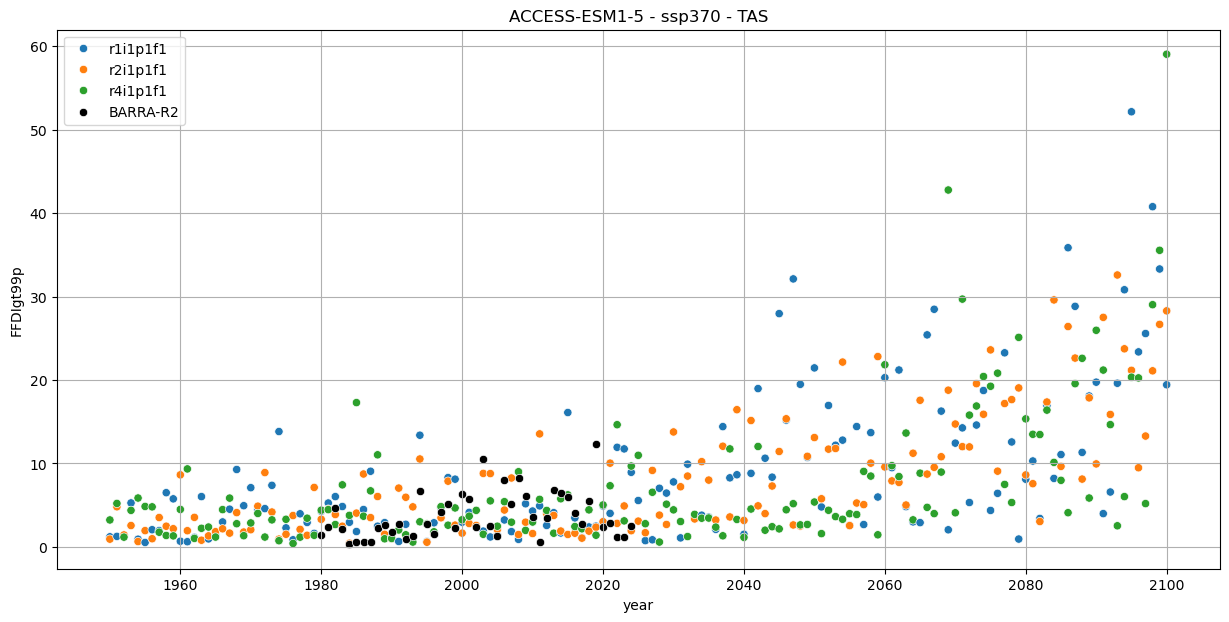

In [9]:
plot_location('ACCESS-ESM1-5', 'ssp370', 'TAS')

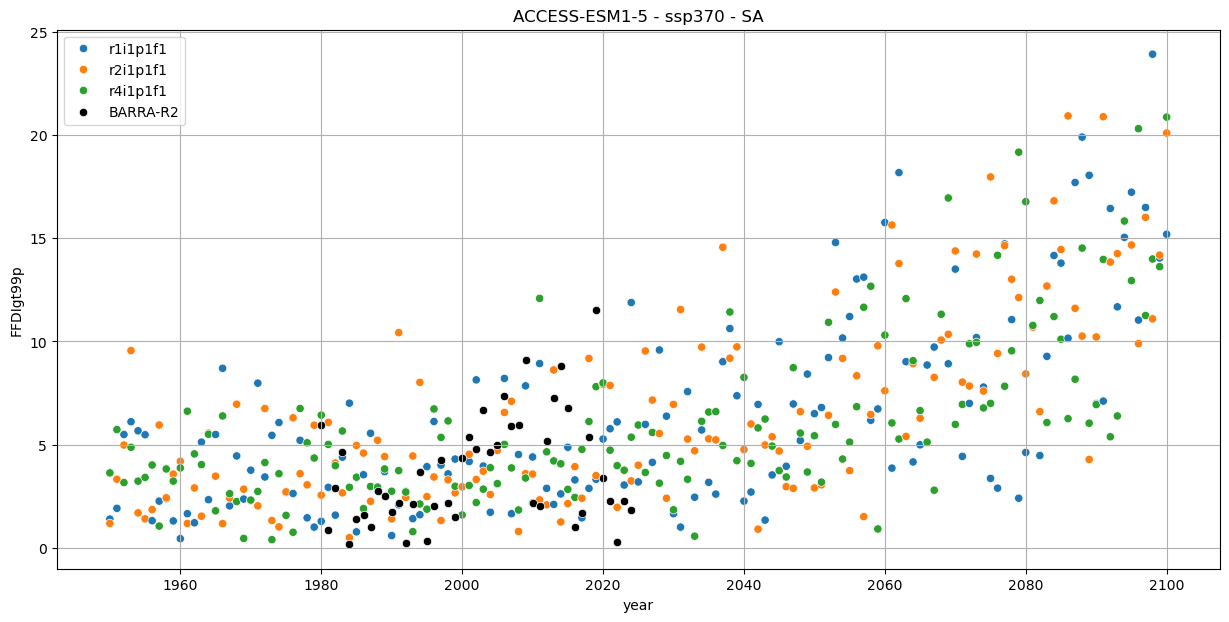

In [10]:
plot_location('ACCESS-ESM1-5', 'ssp370', 'SA')

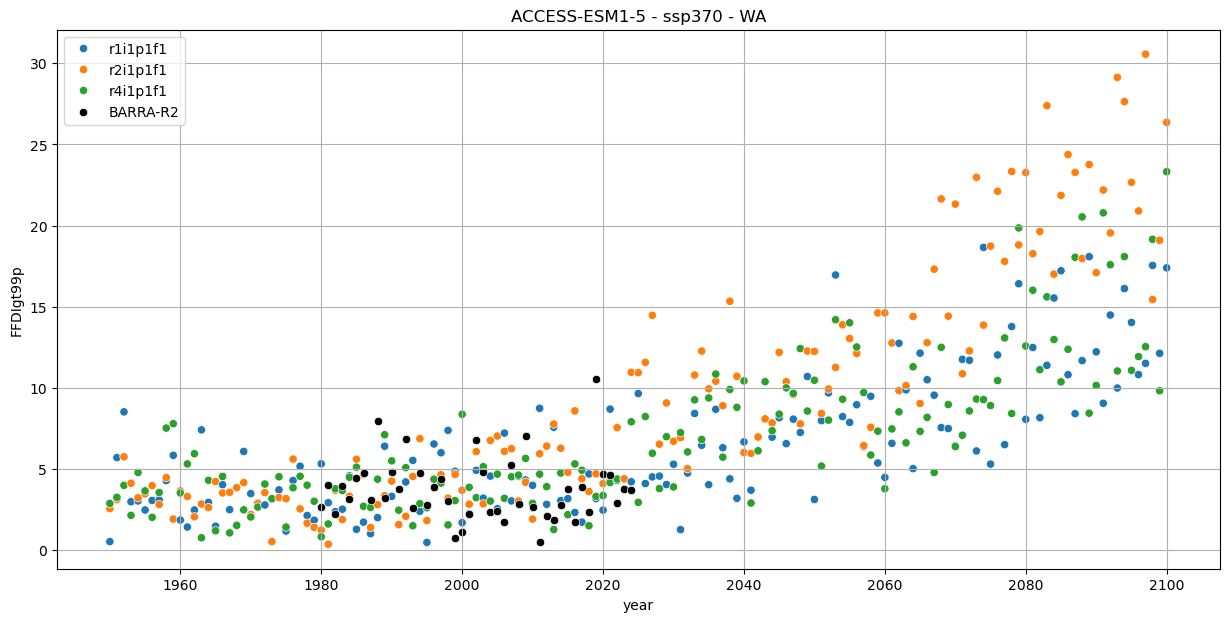

In [11]:
plot_location('ACCESS-ESM1-5', 'ssp370', 'WA')

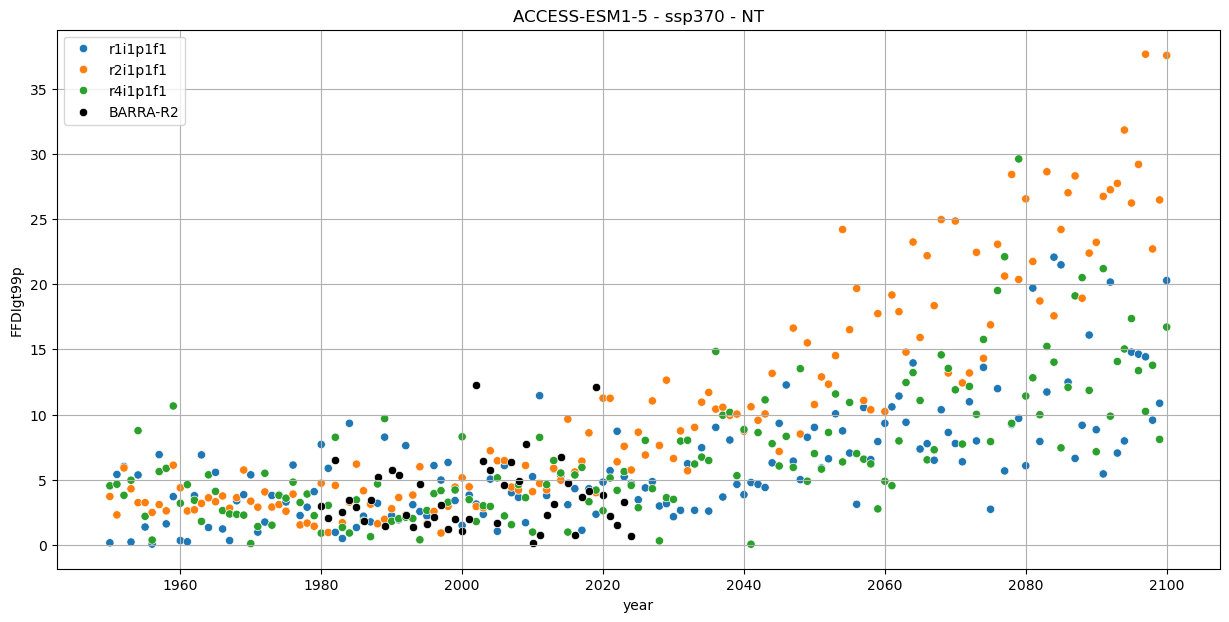

In [12]:
plot_location('ACCESS-ESM1-5', 'ssp370', 'NT')

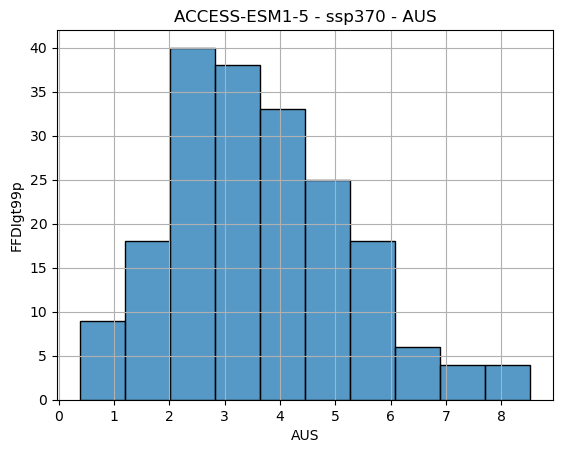

In [13]:
plot_dist('ACCESS-ESM1-5', 'ssp370', 'AUS')

## Ensemble

In [16]:
colors = {
    'ssp126': 'tab:blue',
    'ssp245': 'tab:green',
    'ssp370': 'tab:orange',
    'ssp585': 'tab:red',
}

linestyles = {
    'ACCESS-ESM1-5': '-',
}

return_conversion = {
    '1-in-50 year': '98-0p',
    '1-in-40 year': '97-5p',
    '1-in-30 year': '96-7p',
    '1-in-20 year': '95-0p',
    '1-in-10 year': '90-0p',
}

def plot_ensemble_odds(
    models,
    experiments,
    location,
    return_period,
):
    """Ensemble odds of a year higher than a given return period for a given location."""

    # Plot
    fig, ax = plt.subplots()
    plabel = return_conversion[return_period]
    for model in models:
        for experiment in experiments:
            infile = f'/g/data/xv83/dbi599/rba/FFDI/{model}/{experiment}/ffdigt99p_yr_{plabel}-likelihood_{model}_{experiment}_aus-states_1960-2091.csv'
            df = pd.read_csv(infile, header=7, index_col='year')
            df = df[location]
            sns.lineplot(
                ax=ax,
                data=df,
                label=f'{model} ({experiment})',
                color=colors[experiment],
                linestyle=linestyles[model],
            )
    ax.set_xlabel('year')
    ax.set_ylabel(f'odds of exceeding {return_period} event (%)') 
    ax.set_title(f'FFDIgt99p - {location}')
    ax.grid()
    plt.show()

    # Supporting info
    for model in models:
        pfile = f'/g/data/xv83/dbi599/rba/FFDI/{model}/{experiments[0]}/ffdigt99p_yr_percentiles_{model}_{experiments[0]}_aus-states_1950-2014.csv'
        pdf = pd.read_csv(pfile, header=6, index_col='percentile')
        pdf = pdf[location]
        p = float(plabel[0:-1].replace('-', '.'))
        pval = pdf.loc[p]
        print(f'{return_period} event, {model}: {pval}')
        
    obs = pd.read_csv(
        '/g/data/xv83/dbi599/rba/FFDI/BARRA-R2/FFDIgt99p_yr_BARRA-R2_aus-states_1980-2024.csv',
        index_col='year',
    )
    print('Top 10 years in BARRA-R2:')
    print(obs[location].sort_values(ascending=False)[0:15])

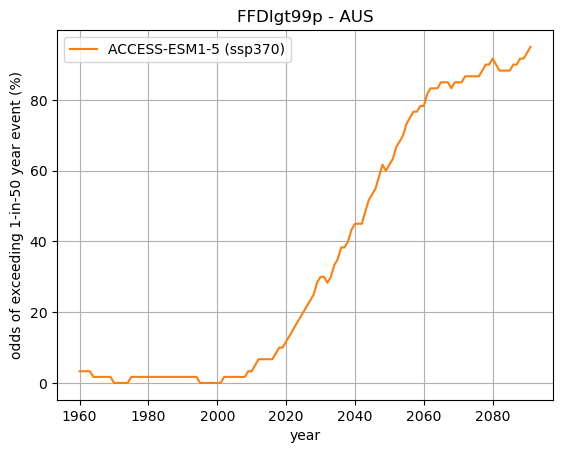

1-in-50 year event, ACCESS-ESM1-5: 7.44
Top 10 years in BARRA-R2:
year
2019    13.35
2002     9.54
2009     8.04
2003     6.72
2014     6.05
1982     5.69
2018     5.36
1994     5.29
2006     5.19
2013     4.97
1988     4.84
2007     4.65
2004     4.31
1990     3.95
1991     3.82
Name: AUS, dtype: float64


In [17]:
plot_ensemble_odds(
    ['ACCESS-ESM1-5', ],
    ['ssp370',],
    'AUS',
    '1-in-50 year',
)

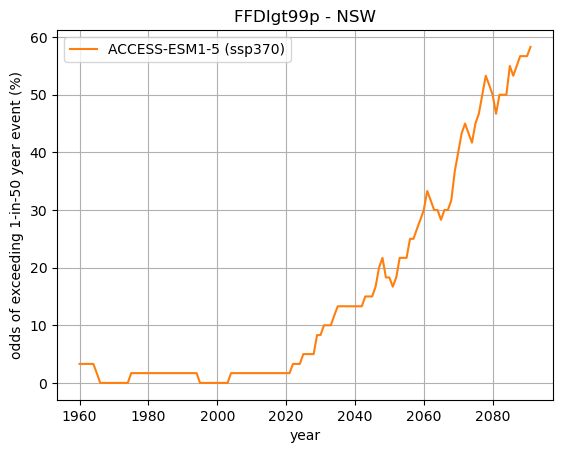

1-in-50 year event, ACCESS-ESM1-5: 15.57
Top 10 years in BARRA-R2:
year
2019    22.40
2009    10.23
2002     9.99
2014     9.64
2013     8.46
2003     7.91
2018     7.89
2006     6.90
2004     6.02
2017     5.98
2005     5.85
2020     5.34
2023     4.57
1980     4.48
1994     4.09
Name: NSW, dtype: float64


In [18]:
plot_ensemble_odds(
    ['ACCESS-ESM1-5',],
    ['ssp370',],
    'NSW',
    '1-in-50 year',
)

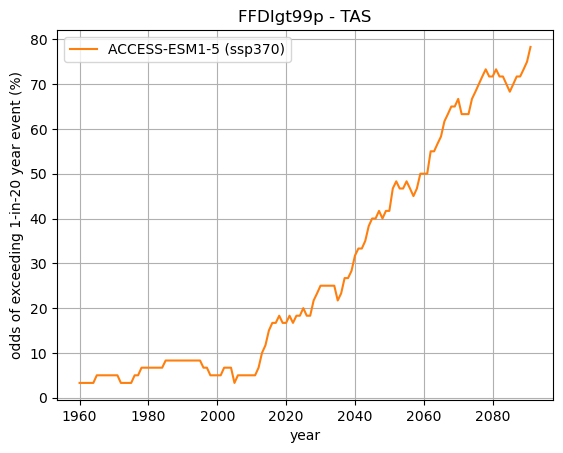

1-in-20 year event, ACCESS-ESM1-5: 8.93
Top 10 years in BARRA-R2:
year
2019    12.34
2003    10.49
2008     8.29
2006     7.98
2013     6.87
1994     6.72
2014     6.47
2000     6.36
2009     6.04
2015     5.99
2001     5.70
2018     5.46
1998     5.18
2007     5.12
1982     4.69
Name: TAS, dtype: float64


In [19]:
plot_ensemble_odds(
    ['ACCESS-ESM1-5',],
    ['ssp370'],
    'TAS',
    '1-in-20 year',
)